<a href="https://colab.research.google.com/github/ElieB-1012/Sales_Prediction_Linear_regression_vs_Polynomial_regression/blob/main/Linear_Regression_vs_Polynomial_Regression_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression vs Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Let's see for each features the relationship between the sales and the ad spend

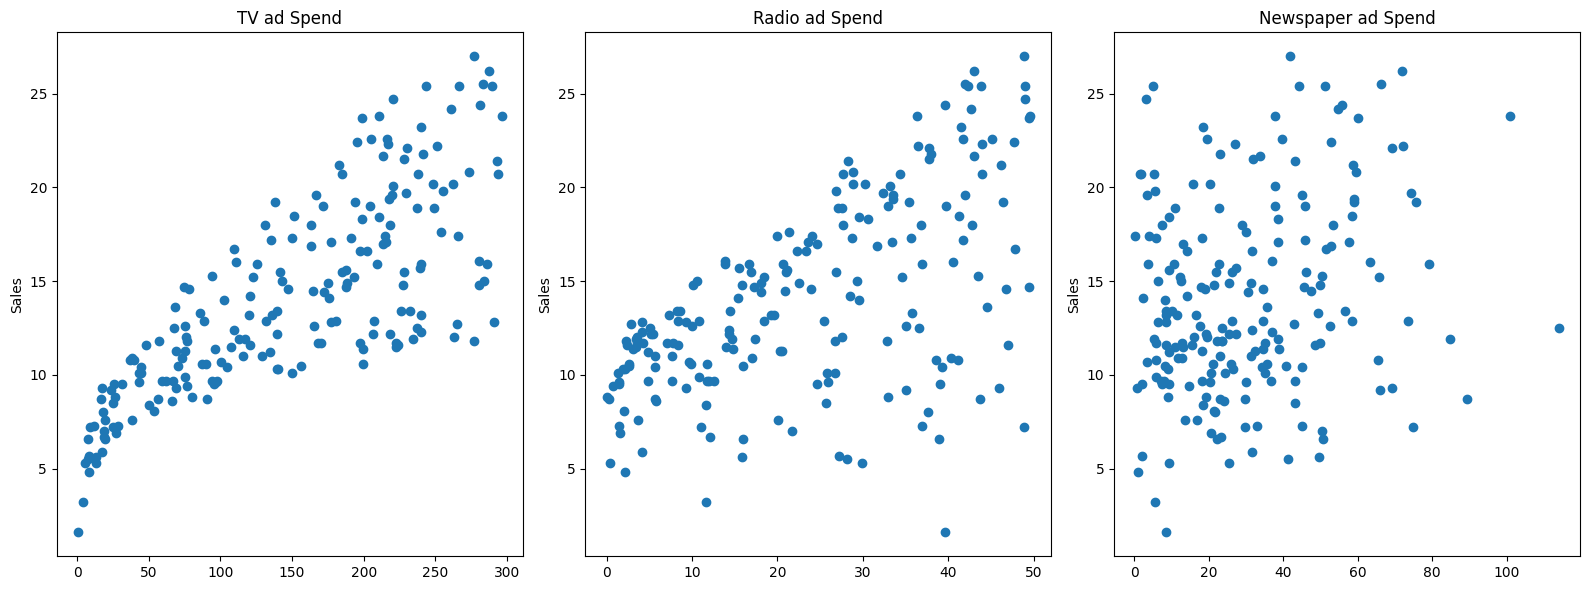

In [3]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV ad Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio ad Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper ad Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

We can observe that the more the advertising expenses are important for the TV and the radio the more the sales are important but we cannot say that of the newspapers

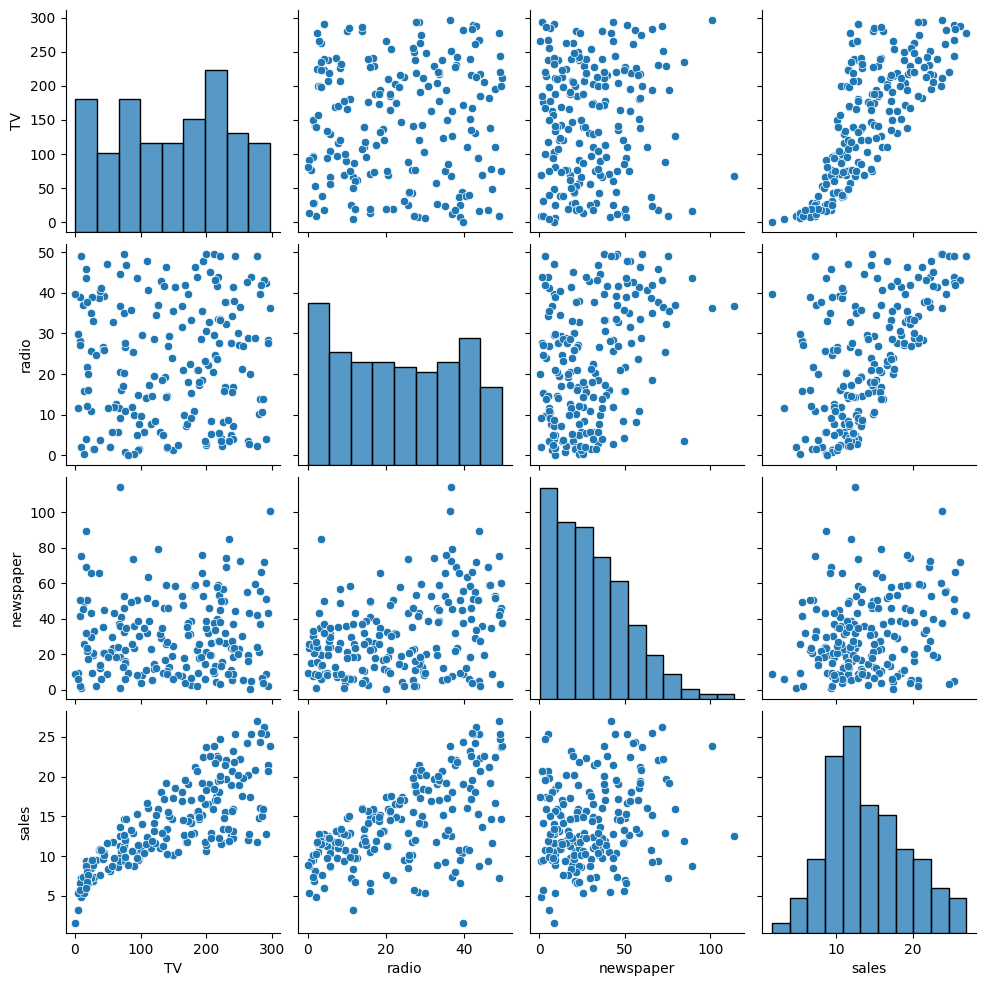

In [4]:
sns.pairplot(df)

## Linear Regression

Separate our dataset into two datasets, one for the features (TV, newspaper, radio) and another for the label (sales)

In [5]:
X = df.drop('sales', axis = 1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

Import Sklearn

In [7]:
from sklearn.model_selection import train_test_split

Train | Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Model Creation

In [9]:
from sklearn.linear_model import LinearRegression

Create an instance of this model

In [10]:
model = LinearRegression()

Train the model on the training data

In [11]:
model.fit(X_train, y_train)

LinearRegression()

Calculation of performance on the test set

In [12]:
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

Compare between our prediction and y_test using mean_absolute_error, mean_squared_error

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [15]:
MAE

1.213745773614481

In [16]:
MSE

2.2987166978863796

In [17]:
RMSE

1.5161519375993884

## Polynomial Regression

Separate our dataset into two datasets, one for the features (TV, newspaper, radio) and another for the label (sales)

In [20]:
X = df.drop('sales',axis=1)
y = df['sales']

Import Sklearn

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [23]:
# Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X.
# Puis il "transforme" et sort les nouvelles données polynomiales.
poly_features = polynomial_converter.fit_transform(X)

In [24]:
poly_features.shape

(200, 9)

In [25]:
X.shape

(200, 3)

Train | Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

Training on polynomial data

Create an instance of the model with parameters

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression(fit_intercept=True)

In [29]:
model.fit(X_train,y_train)

LinearRegression()

Calculation of performance on the test set

In [30]:
test_predictions = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [33]:
MAE

0.4896798044803838

In [34]:
MSE

0.4417505510403753

In [35]:
RMSE

0.6646431757269274

### Comparison with simple linear regression

* Simple linear regression:
     * MAE: 1.213
     * RMSE: 1.516

* 2-degree polynomial regression:
     * MAE: 0.4896
     * RMSE: 0.664